In [96]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline

### Objectives:

* Analyze various different dataset that we have prepared for this problem
* Principal Component Analysis
* KNeighbors Classifier

** Dataset with mean imputation **

In [27]:
train = pd.read_csv('./data/synthesized/train_mean.csv')
test = pd.read_csv('./data/synthesized/test_mean.csv')

In [28]:
features = train.columns[1:-1]

X = train[features]
y = train.Loan_Status

test = test[features]

In [29]:
def do_pca(X, y):
    pca = PCA(n_components=2, whiten=True)
    X = pca.fit_transform(X, y)
    
    colors = ['r', 'g']
    markers = ['s', 'x']
    
    for l, c, m in zip(np.unique(y), colors, markers):
        class_label = ( y == l ).values
        plt.scatter(X[class_label, 0], X[class_label, 1], c=c, label=l, marker=m)
    
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend(loc='best')
    plt.show();

In [30]:
X = scale(X)

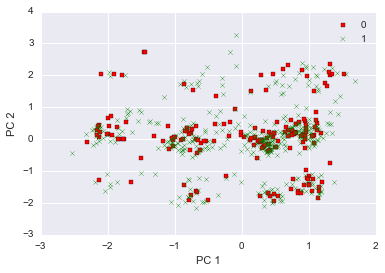

In [31]:
do_pca(X, y)

** Dataset with median imputation **

In [32]:
train = pd.read_csv('./data/synthesized/train_median.csv')
test = pd.read_csv('./data/synthesized/test_median.csv')

In [33]:
features = train.columns[1:-1]

X = train[features]
y = train.Loan_Status

test = test[features]

In [34]:
X = scale(X)

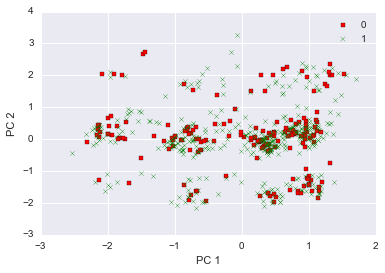

In [35]:
do_pca(X, y)

** Dataset with mode imputation **

In [36]:
train = pd.read_csv('./data/synthesized/train_mode.csv')
test = pd.read_csv('./data/synthesized/test_mode.csv')

In [37]:
features = train.columns[1:-1]

X = train[features]
y = train.Loan_Status

test = test[features]

In [38]:
X = X.fillna(-1)
test = test.fillna(-1)

In [39]:
X = scale(X)

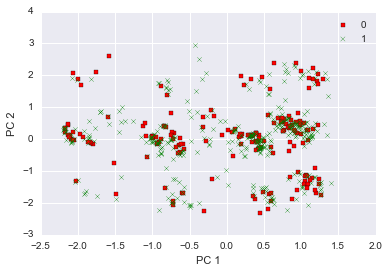

In [40]:
do_pca(X, y)

** KNeighbors Classifier **

In [126]:
train = pd.read_csv('./data/synthesized/train_mean.csv')
test = pd.read_csv('./data/synthesized/test_mean.csv')

In [127]:
features = train.columns[1:-1]

X = train[features]
y = train.Loan_Status

test = test[features]

In [120]:
np.random.seed(251)

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=44)

In [122]:
def get_cross_val_score(X, y, cv):
    k_vals = np.arange(1, 100, 1)
    quality_by_k = [
        cross_val_score(KNeighborsClassifier(n_neighbors=k, weights='uniform'), X, y, cv=cv).mean()
        for k in k_vals
    ]
    return k_vals, quality_by_k


In [123]:
skf = StratifiedKFold(y_train, n_folds=5, shuffle=True, random_state=1279)

k_vals, quality_by_k = get_cross_val_score(X_train, y_train, skf)

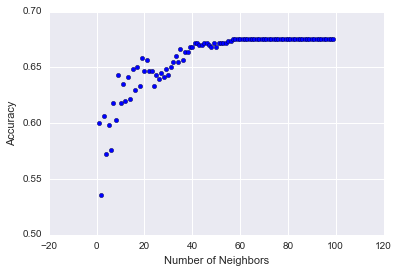

In [124]:
plt.scatter(k_vals, quality_by_k)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy');

In [125]:
print 'Best value for k %d and highest accuracy score %f' %(k_vals[np.argmax(quality_by_k)], max(quality_by_k))

Best value for k 57 and highest accuracy score 0.675629


## After Scaling

In [128]:
X = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=44)

In [129]:
k_vals, quality_by_k = get_cross_val_score(X_train, y_train, skf)

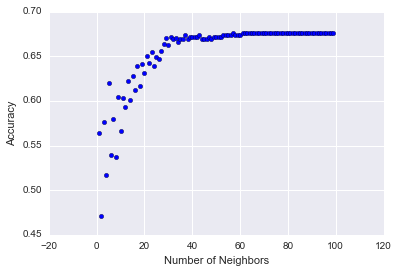

In [130]:
plt.scatter(k_vals, quality_by_k)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy');

In [131]:
print 'Best value for k %d and highest accuracy score %f' %(k_vals[np.argmax(quality_by_k)], max(quality_by_k))

Best value for k 57 and highest accuracy score 0.675629


In [132]:
def get_cross_val_score_by_p(X, y, cv):
    p_vals = np.linspace(1, 10, 100)
    quality_by_p = [
        cross_val_score(KNeighborsClassifier(n_neighbors=57, weights='uniform', metric='minkowski', p=p), X, y, cv=cv).mean()
        for p in p_vals
    ]
    return p_vals, quality_by_p

In [133]:
p_vals, quality_by_p = get_cross_val_score_by_p(X_train, y_train, skf)

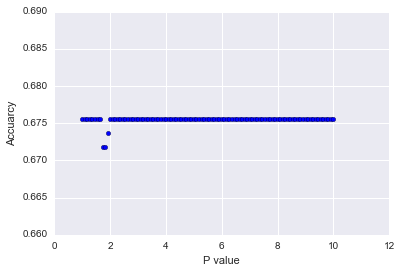

In [134]:
plt.scatter(p_vals, quality_by_p)
plt.xlabel('P value')
plt.ylabel('Accuarcy');

In [135]:
p_vals[np.argmax(quality_by_p)]

1.0

In [136]:
def score_by_thresholds(X, y, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=57, n_jobs=-1, weights='uniform', p=1)
    thresholds = np.linspace(0.1, 0.9, 40)
    quality_by_threshold = []
    knn.fit(X, y)
    
    for threshold in thresholds:
        preds = knn.predict_proba(X_test)[:, 1]
        mapped_preds = map(lambda x: 1 if x > threshold else 0, preds)
        score = accuracy_score(y_test, mapped_preds)
        
        quality_by_threshold.append(score)
    
    return thresholds, quality_by_threshold

In [137]:
thresholds, quality_by_thresholds = score_by_thresholds(X_train, y_train, X_test, y_test)

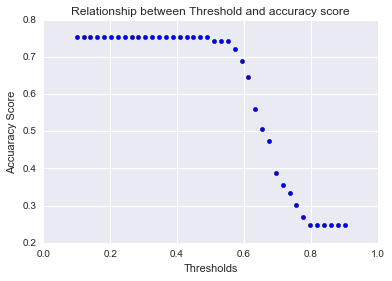

In [138]:
plt.scatter(thresholds, quality_by_thresholds)
plt.xlabel('Thresholds')
plt.ylabel('Accuaracy Score')
plt.title('Relationship between Threshold and accuracy score');

In [139]:
print thresholds[np.argmax(quality_by_thresholds)]

0.1


In [108]:
knn = KNeighborsClassifier(n_neighbors=57, n_jobs=-1, weights='uniform', p=1.0)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=96, p=4.5,
           weights='distance')

In [110]:
preds = knn.predict_proba(X_test)[:, 1]
mapped_preds = map(lambda x: 1 if x > 0.428205128205 else 0, preds)
print 'Accuracy ', accuracy_score(y_test, mapped_preds)

Accuracy  0.763440860215


In [111]:
knn.fit(X, y)
preds = knn.predict_proba(test)[:, 1]
mapped_preds = map(lambda x: 1 if x > 0.428205128205 else 0, preds)

In [112]:
sub = pd.read_csv('./data/Sample_Submission_ZAuTl8O.csv')
test = pd.read_csv('./data/test_Y3wMUE5.csv')

In [114]:
sub['Loan_ID'] = test.Loan_ID
sub['Loan_Status'] = mapped_preds

In [116]:
sub.Loan_Status.value_counts()

1    367
Name: Loan_Status, dtype: int64